In [1]:
from sklearn.datasets import make_classification
X,y = make_classification(n_samples=100,n_classes=2,n_clusters_per_class=1,n_informative=1,n_redundant=0,n_features=2,hypercube=False,random_state=41,class_sep=10)

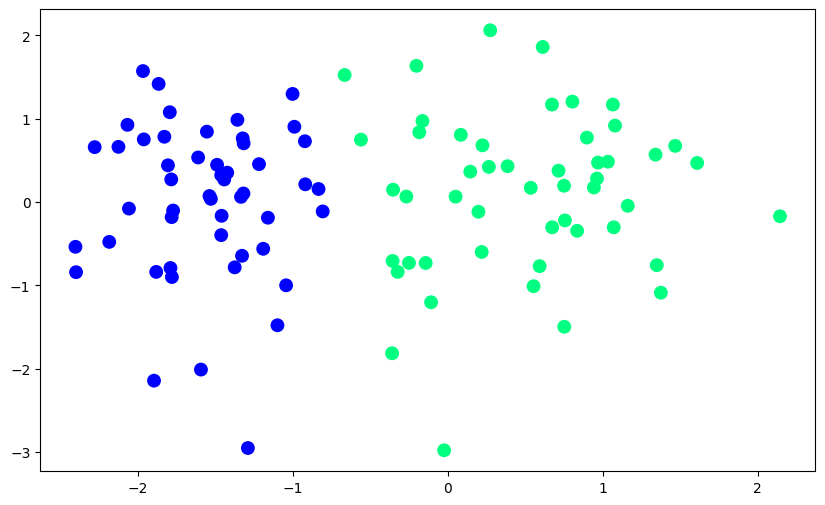

In [2]:
import matplotlib.pyplot as plt 
plt.figure(figsize=(10,6))
plt.scatter(X[:,0],X[:,1],c=y,cmap ="winter",s=80)

In [3]:
##imports
import numpy as np
import random

In [4]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size =0.2,random_state=42)

In [5]:
import math

In [123]:
import numpy as np

class Perceptron:
    def __init__(self):
        self._intercept = None
        self._coef = None

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))  # Use NumPy for array compatibility

    def improve(self, w, X, y, preds):
        lr = 0.5
        m = len(X)
        preds = np.array(preds)
        error = y - preds
        
        # print("error shape:", error.shape)  # Should be (100,)
        # print("X shape:", X.shape)  # Should be (100, 4) after adding intercept

        # Update weights correctly using the dot product
        w += (1 / m) * lr * np.dot(X.T, error)  # Correct weight update without loop

        return w

    def calculate_loss(self, preds, y, X):
        preds = np.array(preds)
        # Adding a small constant to avoid log(0)
        loss = (-1 / len(X)) * (np.dot(y, np.log(preds + 1e-15)) + np.dot(1 - y, np.log(1 - preds + 1e-15)))
        return loss

    def fit(self, X, y):
        weights = np.ones(X.shape[1] + 1)  # +1 for intercept
        X = np.insert(X, 0, 1, axis=1)  # Add intercept column

        for i in range(2500):  # You can increase this to train more epochs
            predictions = []
            for j in range(X.shape[0]):
                z = np.dot(weights, X[j])
                y_pred = self.sigmoid(z)
                predictions.append(y_pred)
            loss = self.calculate_loss(predictions, y, X)
            print("loss:", loss)
            weights = self.improve(weights, X, y, predictions)

        self._intercept = weights[0]
        self._coef = weights[1:]
        return predictions

# Example usage:
p = Perceptron()
preds = p.fit(X, y)


loss: 0.42523833477213385
100
loss: 0.36779744758227423
100
loss: 0.32738334550530357
100
loss: 0.29791469317051567
100
loss: 0.27562754885439034
100
loss: 0.25819684647060387
100
loss: 0.24415935222629415
100
loss: 0.2325688647952461
100
loss: 0.22279517034246665
100
loss: 0.2144061348289549
100
loss: 0.20709722737462677
100
loss: 0.200648361823223
100
loss: 0.19489678186180462
100
loss: 0.1897195910410025
100
loss: 0.18502222369545457
100
loss: 0.1807306634822843
100
loss: 0.17678608025957857
100
loss: 0.17314106116234423
100
loss: 0.16975691373154497
100
loss: 0.1666017034782099
100
loss: 0.16364880337982812
100
loss: 0.16087580603944573
100
loss: 0.15826369668905857
100
loss: 0.15579621649619088
100
loss: 0.15345936658189932
100
loss: 0.15124101740241438
100
loss: 0.1491305979690461
100
loss: 0.14711884624508026
100
loss: 0.1451976069159579
100
loss: 0.14335966620798535
100
loss: 0.14159861595098333
100
loss: 0.13990874092585237
100
loss: 0.13828492490370767
100
loss: 0.13672257180

In [115]:
preds


[0.9997333681937115,
 0.9728524828788366,
 0.9290641365336487,
 4.319288583197532e-05,
 0.9950952577860809,
 0.17196366701700605,
 3.2634701483427484e-05,
 0.9995146083467082,
 0.7999984066422288,
 5.437603298563305e-06,
 1.2873845112694315e-05,
 1.8664715411735654e-05,
 0.9896265341235689,
 0.9999996213375155,
 1.988764887879928e-05,
 0.9999675703719528,
 0.990215806157676,
 5.012471850438456e-06,
 0.9937108986137235,
 2.1292932147254552e-05,
 2.4374071088576196e-07,
 2.1608625628317324e-06,
 0.0018840741030298187,
 0.9999999997602573,
 0.005969356245898223,
 0.999998310529251,
 1.2474170590671283e-05,
 0.014642800690947663,
 3.8729379538807293e-08,
 2.068624073032555e-05,
 0.0006255545269077455,
 0.9999999942830666,
 0.9998647012799813,
 0.9999911873530332,
 0.9999860183559307,
 0.9435996432711384,
 0.06460619948058202,
 0.9999986262062858,
 0.00014222467357442265,
 0.99999870143579,
 0.0011565964765622788,
 0.08587037362369238,
 0.0020822610908842656,
 0.9999999991576858,
 0.1890780

In [116]:
y

array([1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1])

In [117]:
weights = p._coef
weights=np.insert(weights,0,p._intercept)
weights


array([6.37176029, 9.64369151, 0.5373282 ])

In [118]:
m = -p._coef[0]/p._coef[1]
b = -p._intercept/p._coef[1]
x_input = np.linspace(-3,3,100)
y_input = m*x_input +b

In [119]:
from sklearn.linear_model import LogisticRegression
lr =LogisticRegression(penalty=None,solver='sag')
model = lr.fit(X,y)

C:\Users\PMLS\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [120]:
weights2 = model.coef_
weights2=np.insert(weights2,0,model.intercept_)
weights2


array([ 8.96062872, 13.51671026,  0.99168281])

In [121]:
m2 = -model.coef_[0][0]/model.coef_[0][1]
b2 = -model.intercept_[0]/model.coef_[0][1]
x_input2 = np.linspace(-3,3,100)
y_input2 = m2*x_input +b2

(-3.0, 2.0)

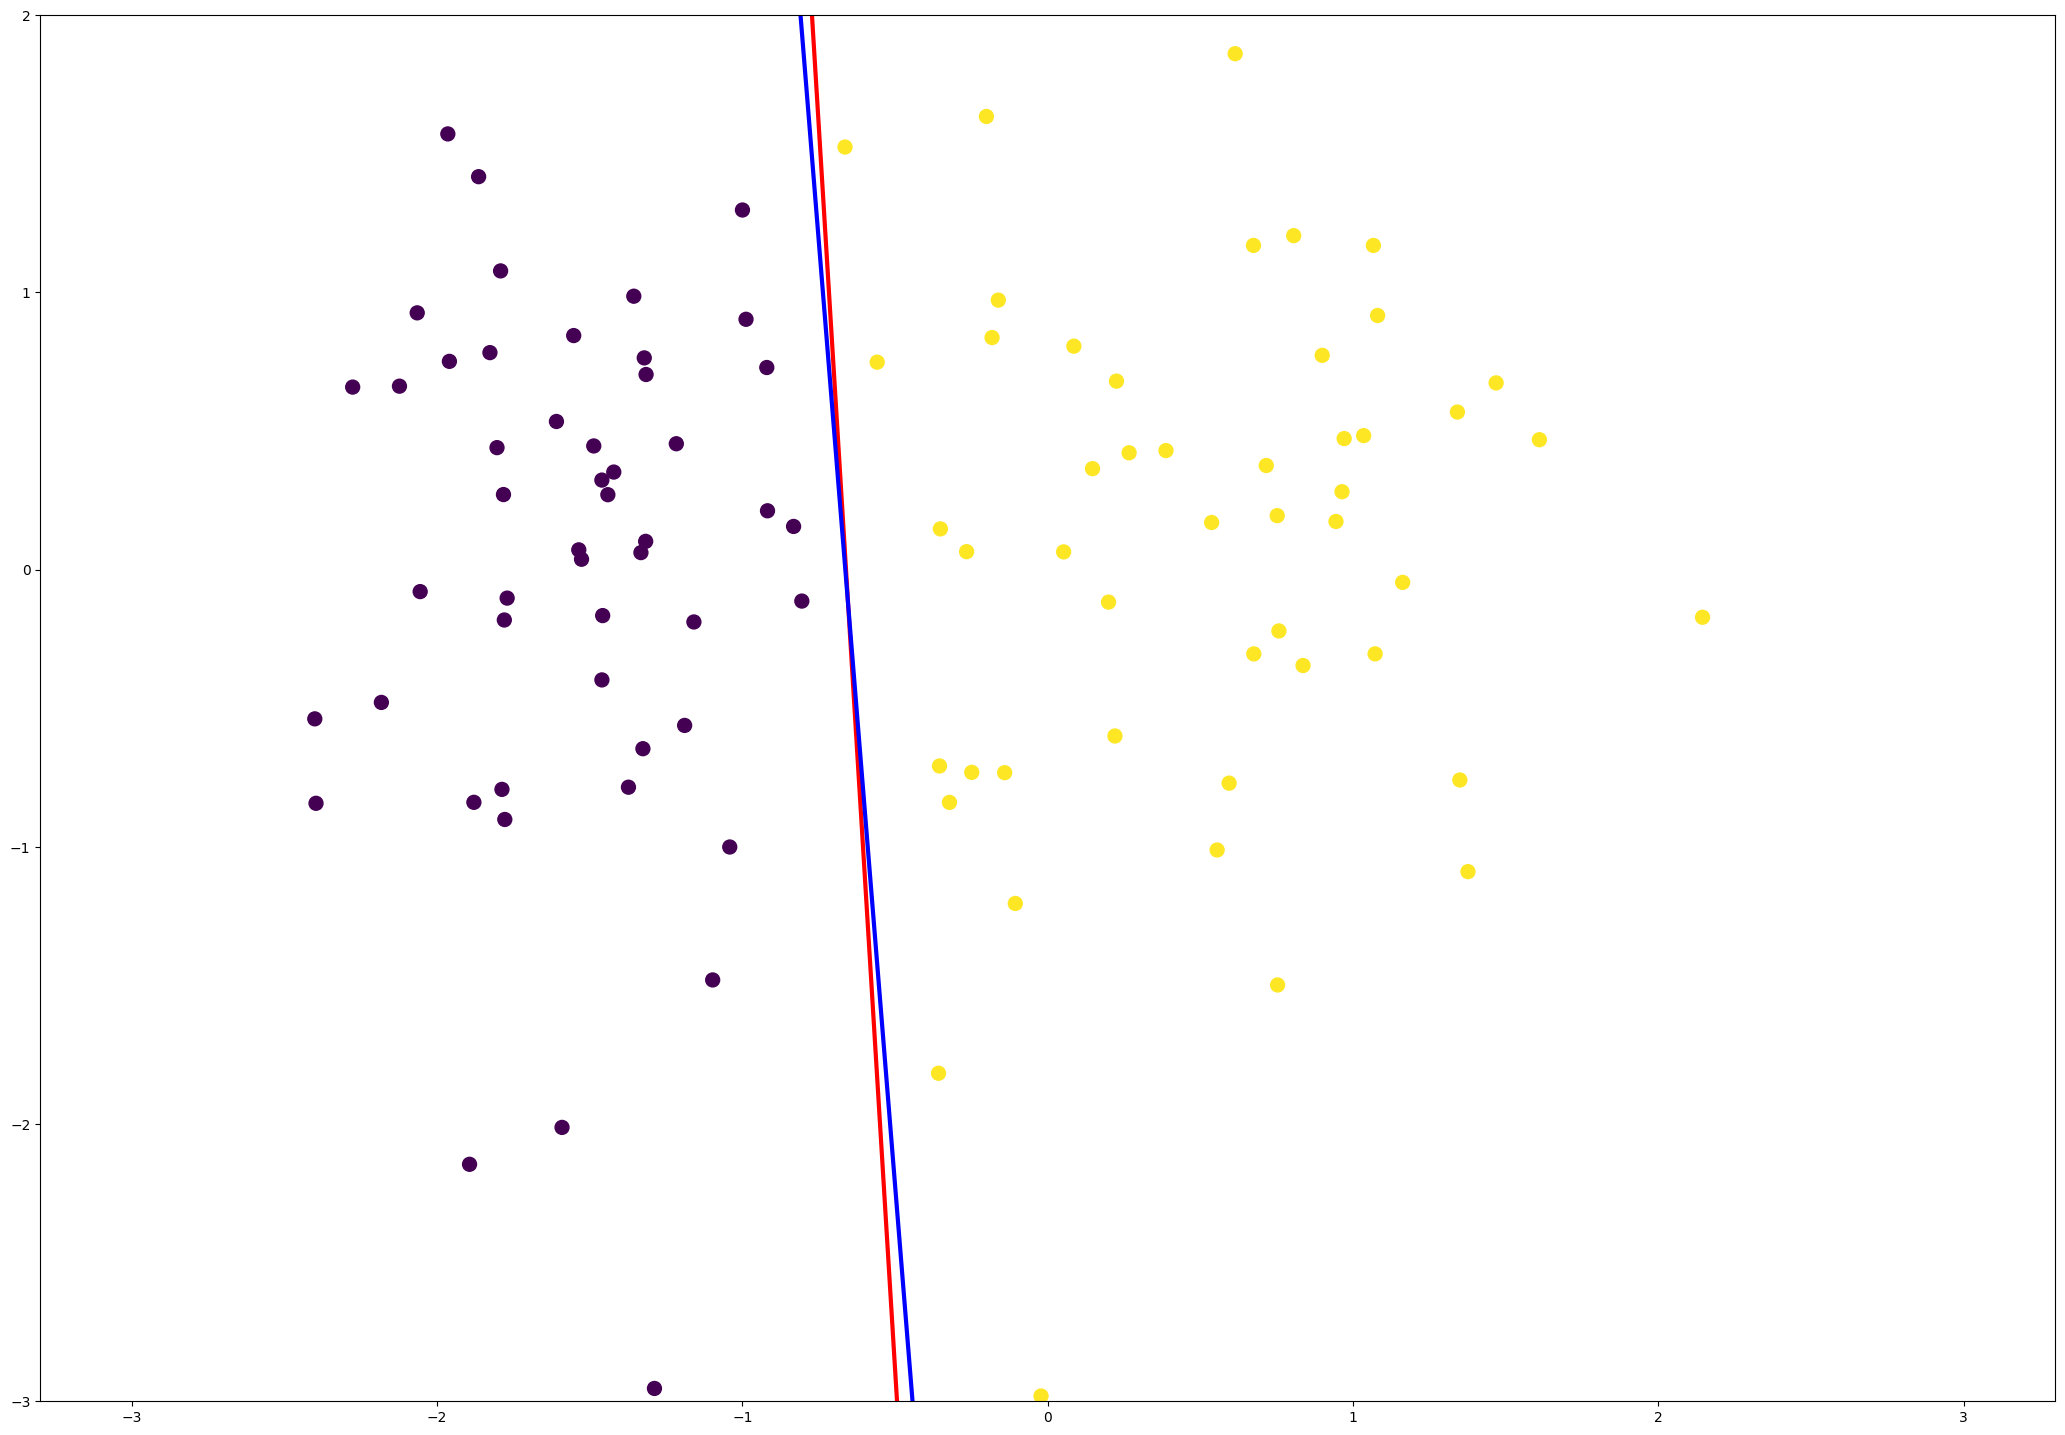

In [122]:
import matplotlib.pyplot as plt
plt.figure(figsize=(26,18))
plt.scatter(X[:,0],X[:,1],c=y,s=100)
plt.plot(x_input,y_input,color="red",linewidth =3)
plt.plot(x_input2,y_input2,color="blue",linewidth =3)
plt.ylim(-3,2)